In [16]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

2.9.1


In [17]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


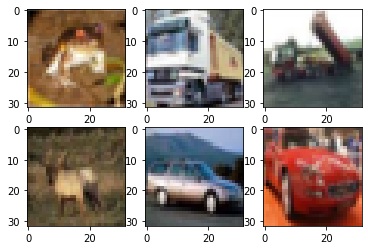

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [18]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
train_images = train_images/255 

test_labels = test_labels.reshape(-1,)
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



### Dense Neural Network which we used in MNIST 
#### same model gave accuracy for 97% on MNIST


In [29]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

# model.summary()

### CNN Model that we used for MNIST dataet
#### same model gave accuracy for 98% on MNIST


In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(10))

# model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

### Complile and Train the model

In [30]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=100

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/10
500/500 [==============================] - 1s 775us/step - loss: 1.9528 - accuracy: 0.3051
Epoch 2/10
500/500 [==============================] - 0s 787us/step - loss: 1.7922 - accuracy: 0.3669
Epoch 3/10
500/500 [==============================] - 0s 860us/step - loss: 1.7205 - accuracy: 0.3901
Epoch 4/10
500/500 [==============================] - 0s 894us/step - loss: 1.6713 - accuracy: 0.4043
Epoch 5/10
500/500 [==============================] - 0s 888us/step - loss: 1.6415 - accuracy: 0.4161
Epoch 6/10
500/500 [==============================] - 0s 914us/step - loss: 1.6210 - accuracy: 0.4242
Epoch 7/10
500/500 [==============================] - 0s 919us/step - loss: 1.6062 - accuracy: 0.4272
Epoch 8/10
500/500 [==============================] - 0s 832us/step - loss: 1.5890 - accuracy: 0.4359
Epoch 9/10
500/500 [==============================] - 0s 768us/step - loss: 1.5764 - accuracy: 0.4388
Epoch 10/10
500/500 [==============================] - 0s 769us/step - loss: 1.570

In [31]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

100/100 [==============================] - 0s 521us/step - loss: 1.5657 - accuracy: 0.4401
Accuracy :  0.4401000142097473


#### Adding SoftMax Layer

Prediction :  frog


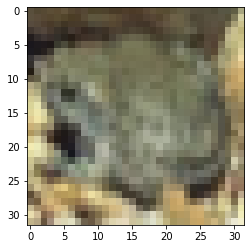

In [32]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(1000)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",classes[test_labels[label0]])

313/313 [==============================] - 0s 387us/step


<AxesSubplot:>

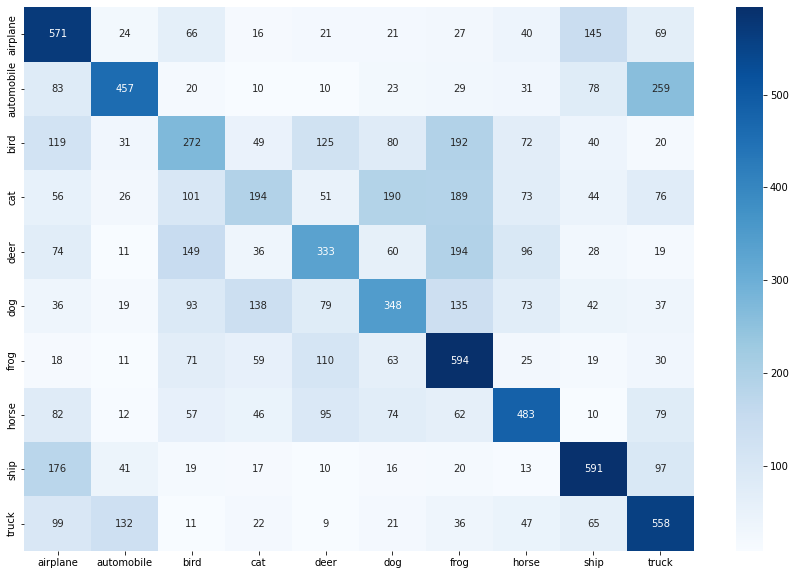

In [37]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")